# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to example files, which are sparc4-pipeline products obtained from the reduction of data in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link).

In [2]:
db_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs2/20250325_sparc4acs2_db.csv'

phot_lightcurve_example ='/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs2/20250325_s4c2_v1025cen_POLAR_L4_S+N_lc.fits'

polar_stack_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs2/20250325_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits'

polar_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs2/20250325_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits'

polar_time_series_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs2/20250325_s4c2_v1025cen_POLAR_L4_ts.fits'

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipelin` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [3]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:15.810000,0.3,0,0,DOMEFLAT,FLAT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,1,L4,None,True
1,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:17.230063,0.3,0,0,DOMEFLAT,FLAT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,1,L4,None,True
2,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:18.650126,0.3,0,0,DOMEFLAT,FLAT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,1,L4,None,True
3,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:20.070189,0.3,0,0,DOMEFLAT,FLAT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,1,L4,None,True
4,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:21.490251,0.3,0,0,DOMEFLAT,FLAT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,1,L4,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-26T08:02:58.856000,100.0,12:38:16.2,-38:42:45.6,V1025Cen,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,12,L4,None,True
1495,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-26T08:04:41.259000,100.0,12:38:16.2,-38:42:45.6,V1025Cen,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,13,L4,None,True
1496,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-26T08:06:23.671000,100.0,12:38:16.2,-38:42:45.6,V1025Cen,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,14,L4,None,True
1497,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-26T08:08:06.064000,100.0,12:38:16.2,-38:42:45.6,V1025Cen,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,15,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [4]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs2/20250325_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   79R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   79R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   79R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   79R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   79R x 13C   [I11, D25.17,

Then we plot the science frame using the `sparc4.product_plots` library

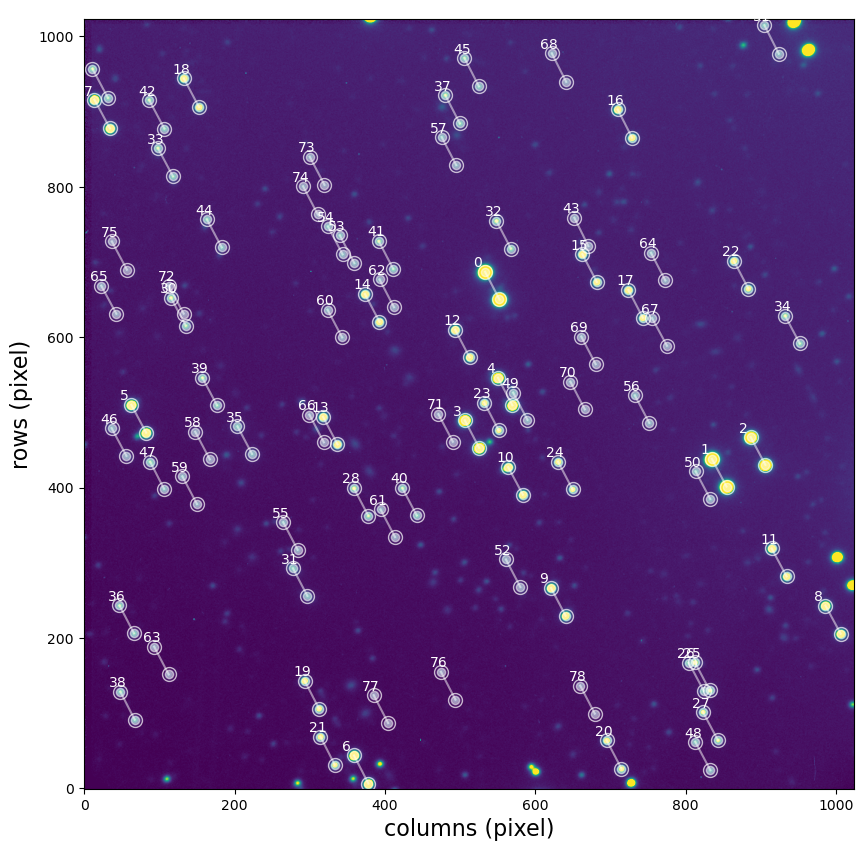

In [5]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [6]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,189.564759,-38.693986,552.327875,650.159400,6.854365,6.854365,-11.095407,0.000733,-9.403405,0.000543,10,0
1,1,189.527341,-38.716314,854.266008,401.313554,6.855604,6.855604,-10.986551,0.000787,-9.407818,0.000732,10,0
2,2,189.521258,-38.713443,905.974656,430.104806,6.838887,6.838887,-10.376424,0.001116,-9.412917,0.000565,10,0
3,3,189.567117,-38.712591,525.326708,452.885538,6.817340,6.817340,-10.078773,0.001348,-9.388594,0.000642,10,0
4,4,189.562062,-38.707140,569.452915,509.449315,6.799948,6.799948,-9.848547,0.001553,-9.397352,0.000538,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,74,189.594385,-38.684123,310.651496,763.220431,6.481370,6.481370,-5.970707,0.037258,-9.400266,0.000534,10,0
75,75,189.624650,-38.691829,56.848681,689.838115,7.006433,7.006433,-5.876101,0.040439,-9.389952,0.000540,10,0
76,76,189.569428,-38.744053,493.745437,118.005393,6.451347,6.451347,-5.760193,0.043599,-9.362814,0.000454,10,0
77,77,189.580052,-38.747256,404.227974,86.850558,6.634041,6.634041,-5.706963,0.045955,-9.360749,0.000483,10,0


Below we select the source with index number 3 assigned as the main target to be analyzed. Then we select three other stars with indices 0, 1, and 2, as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

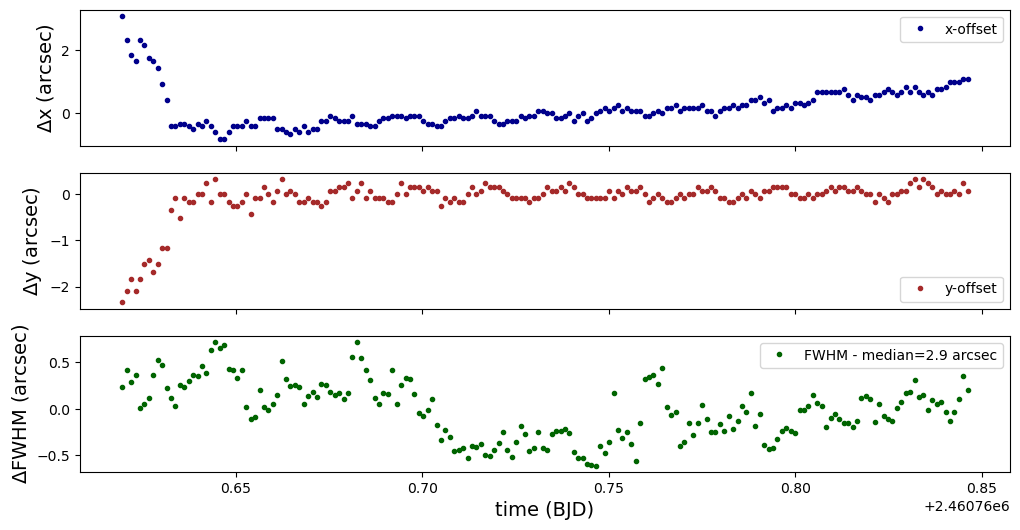

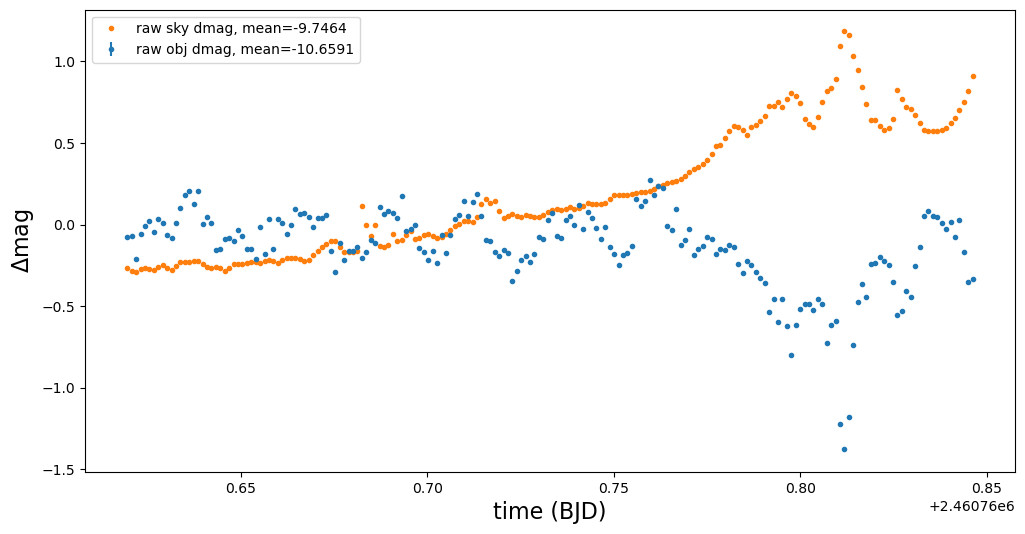

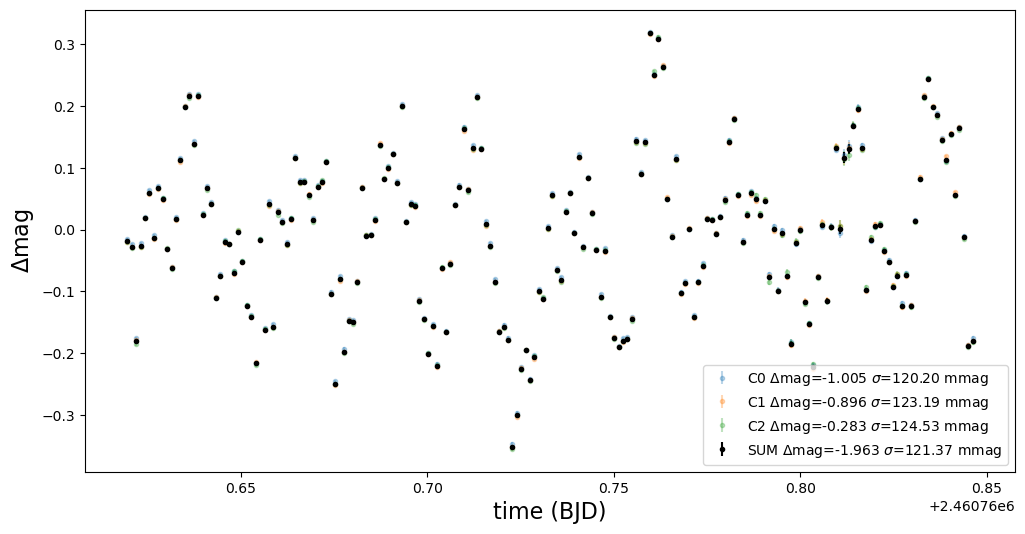

       TIME                x         ...       diffmagsum     
------------------ ----------------- ... ---------------------
 2460760.619578525 515.7564345743972 ...  -0.01892175750289926
 2460760.620766467 513.5064345743972 ... -0.027284969518414748
 2460760.621951723 512.0064345743972 ...  -0.17988695111311248
2460760.6231369334 511.5064345743972 ... -0.026420116756427525
2460760.6243225485 513.5064345743972 ...   0.01857815095269455
2460760.6255097496 513.0064345743972 ...  0.060087335360187843
2460760.6266953647 511.7564345743972 ...  -0.01292915028246977
               ...               ... ...                   ...
 2460760.839060166 508.7564345743972 ...    0.1129858680332747
2460760.8402465205 509.0064345743972 ...   0.15416259552384037
 2460760.841434055 509.5064345743972 ...   0.05678226644810547
2460760.8426193097 509.5064345743972 ...   0.16455975822758706
2460760.8438046686 509.5064345743972 ... -0.012280695558248844
2460760.8449898073 509.7564345743972 ...  -0.1886729665

In [7]:
catalog = 'CATALOG_PHOT_AP010'
target=3
comps=[0,1,2]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [8]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs2/20250325_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1179   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU   1618   79R x 803C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 

Below we print one of the catalog extensions

In [9]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

Then we can print all column names to check the data available in each catalog

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE0189', 'EFE0189', 'FO0190', 'EFO0190', 'FE0190', 'EFE0190', 'FO0191',
       'EFO0191', 'FE0191', 'EFE0191'],
      dtype='object', length=803)

Finally, we can select the source of interest (in this case index=0) and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-09-18 01:10:00,272 astropop - INFO - Normalization disabled.  [__init__]


2025-09-18 01:10:00,272 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-09-18 01:10:00,286 root - INFO - Source index: i=3   [pipeline_lib]


2025-09-18 01:10:00,286 | INFO | Source index: i=3 


2025-09-18 01:10:00,287 root - INFO - Source RA=189.56711715375678 Dec=-38.71259127531649 mag=-16.3995+-0.0002  [pipeline_lib]


2025-09-18 01:10:00,287 | INFO | Source RA=189.56711715375678 Dec=-38.71259127531649 mag=-16.3995+-0.0002


2025-09-18 01:10:00,287 root - INFO - Best aperture radius: 15.0 pixels  [pipeline_lib]


2025-09-18 01:10:00,287 | INFO | Best aperture radius: 15.0 pixels


2025-09-18 01:10:00,288 root - INFO - Polarization in Q: -0.0021+-0.0004  [pipeline_lib]


2025-09-18 01:10:00,288 | INFO | Polarization in Q: -0.0021+-0.0004


2025-09-18 01:10:00,289 root - INFO - Polarization in U: -0.0017+-0.0006  [pipeline_lib]


2025-09-18 01:10:00,289 | INFO | Polarization in U: -0.0017+-0.0006


2025-09-18 01:10:00,290 root - INFO - Polarization in V: 0.0001+-0.0003  [pipeline_lib]


2025-09-18 01:10:00,290 | INFO | Polarization in V: 0.0001+-0.0003


2025-09-18 01:10:00,291 root - INFO - Total linear polarization p: 0.0027+-0.0005  [pipeline_lib]


2025-09-18 01:10:00,291 | INFO | Total linear polarization p: 0.0027+-0.0005


2025-09-18 01:10:00,292 root - INFO - Angle of polarization theta: 109+-5 deg  [pipeline_lib]


2025-09-18 01:10:00,292 | INFO | Angle of polarization theta: 109+-5 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-09-18 01:10:00,294 root - INFO - Free constant k: 1.1886357230634828+-0.0  [pipeline_lib]


2025-09-18 01:10:00,294 | INFO | Free constant k: 1.1886357230634828+-0.0


2025-09-18 01:10:00,295 root - INFO - Zero of polarization: 27.2+-0.0  [pipeline_lib]


2025-09-18 01:10:00,295 | INFO | Zero of polarization: 27.2+-0.0


2025-09-18 01:10:00,295 root - INFO - RMS of zi residuals: 0.0033387722125300537  [pipeline_lib]


2025-09-18 01:10:00,295 | INFO | RMS of zi residuals: 0.0033387722125300537


2025-09-18 01:10:00,296 root - INFO - Reduced chi-square (n=192.0, DOF=189.0): 1.44  [pipeline_lib]


2025-09-18 01:10:00,296 | INFO | Reduced chi-square (n=192.0, DOF=189.0): 1.44


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-09-18 01:10:00,383 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:10:00,383 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 01:10:00,388 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:10:00,388 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 01:10:00,607 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:10:00,607 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 01:10:00,613 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:10:00,613 | INFO | Substituting symbol \perp from STIXGeneral


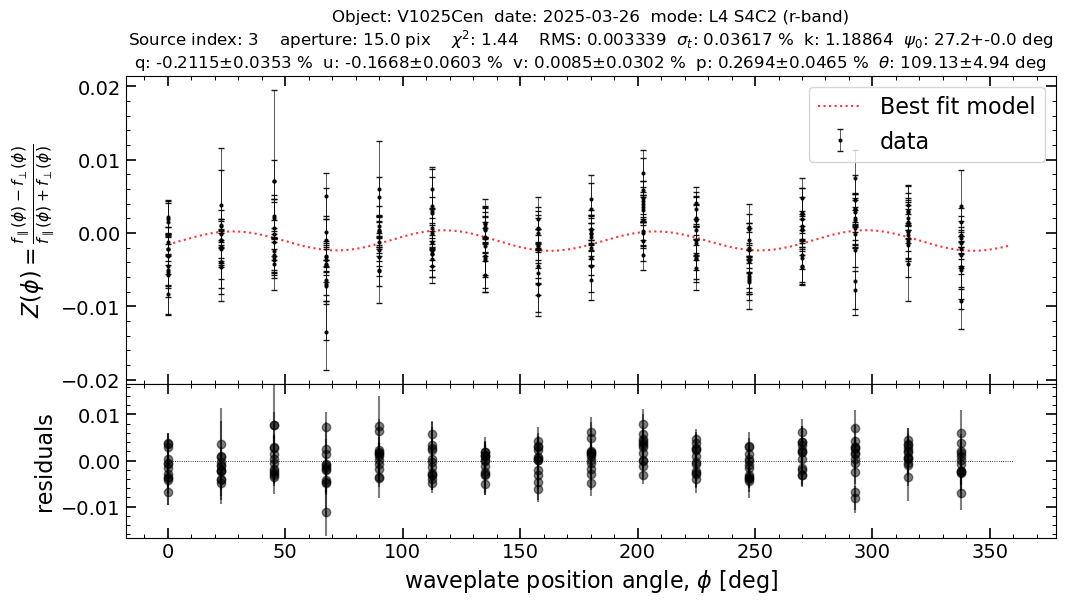

In [11]:
source_index = 3

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [12]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs2/20250325_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
SOURCE_INDEX : 3
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 5
APERTURE_RADIUS : 15.0
NEXPS : 192
MAG : -16.3995+-0.0002
RA : 189.56711715375678
DEC : -38.71259127531649
FWHM : 6.120423823299991
X1 : 506.18616083049
Y1 : 489.5050821079339
X2 : 525.3267083183043
Y2 : 452.88553824258855
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 225.  247.5 270.  292.5 315.  337.5
   0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  2

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [13]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.27+-0.05 %  Angle of polarization: 109+-5 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [14]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [15]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

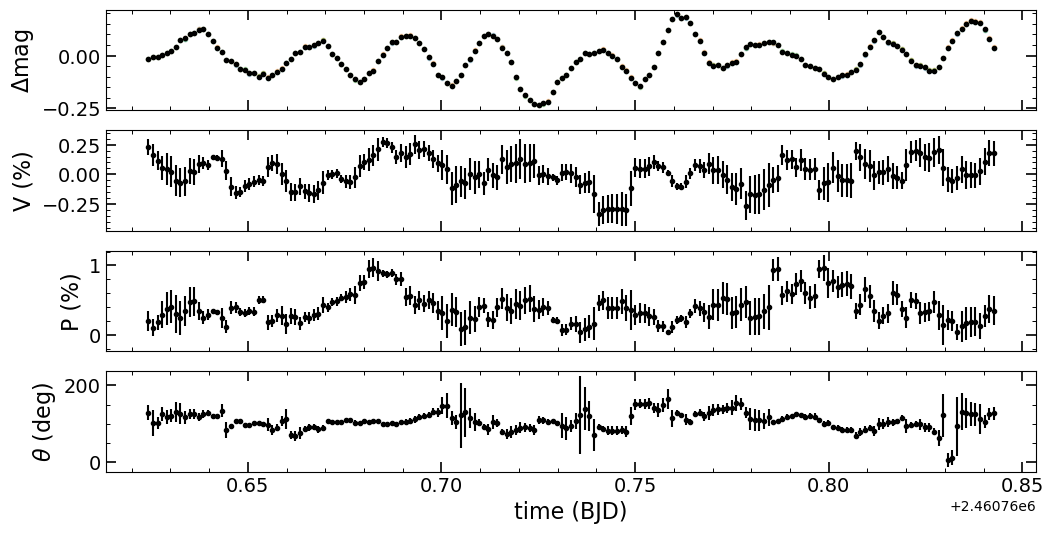

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-0.015408641003327617,0.0006460885879272381,-0.016534127233866158,0.0006573456635563638,-0.01763227889301433,0.0007542315682569494,2460760.624309272,506.18616083049,489.5050821079339,525.3267083183043,452.88553824258855,6.652160119252185,-12.967479476745382,0.0005891262933223965,-14.942976163799774,0.000614157695506738,-0.01647181505971851,0.0020547161820872253,0.0014025528088640678,129.20101965319495,19.522409315317056
-0.006905102885950143,0.0006421858434194672,-0.007790466343164937,0.0006536306181024804,-0.008573431074268001,0.0007509099250513796,2460760.6254958943,503.93616083049,490.2550821079339,523.0767083183043,453.63553824258855,6.76140902599426,-12.978294705007649,0.0005848458217431537,-14.945079584534959,0.000614302411128914,-0.007760007532636948,0.0010377081530131577,0.0012217762579728433,100.98538262989172,33.67305236695028
-0.007901944089702795,0.0006421810746541054,-0.008098098960331868,0.000653870269089052,-0.008722971682553649,0.0007510210370129392,2460760.626681295,502.43616083049,491.0050821079339,521.5767083183043,454.38553824258855,6.76140902599426,-12.978749135602394,0.0005849284878568783,-14.946092246954198,0.0006144521557931737,-0.008318239357130608,0.0018532968803741052,0.0010561718623997485,101.78454977653462,16.29880003819752
0.00483113105055466,0.0006360954098445177,0.005067760990520753,0.0006479771376136466,0.004964446997684391,0.0007457344814620916,2460760.627866361,501.93616083049,490.2550821079339,521.0767083183043,453.63553824258855,6.724363291143716,-12.99321051539781,0.000578296902714029,-14.94745529847111,0.0006142717111106916,0.004780088921371828,0.0029076977530286038,0.0019316841796567015,124.93068660161691,18.999969126996877
0.010147339827678792,0.0006326895623482521,0.010404789695217076,0.0006445024572732677,0.010402294165547943,0.0007422869263152732,2460760.629051785,503.93616083049,491.0050821079339,523.0767083183043,454.38553824258855,6.484545855416772,-13.001356686163053,0.000574688943480142,-14.950251574724527,0.0006130801215496335,0.01012998343319893,0.0038190515013044823,0.002402980953476708,117.24920121251984,17.995372737434728
0.02280095660022674,0.0006268110921516465,0.02255635827239999,0.0006386214245837222,0.022829167987596932,0.0007367791997322746,2460760.6302380254,503.43616083049,492.0050821079339,522.5767083183043,455.38553824258855,6.484545855416772,-13.015956295436746,0.0005682514370712332,-14.952433850769376,0.0006122450254099646,0.02254731666204357,0.004088521687368048,0.002393018325502241,121.01514546837717,16.73962604156369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.14844489921776471,0.0008641259706119612,0.15299512448311603,0.0008826379869359685,0.14960279297040557,0.0010451359894722663,2460760.8354841005,498.93616083049,497.2550821079339,518.0767083183043,460.63553824258855,6.3209863431426445,-13.000510834129699,0.0007773268452156674,-14.809310231433184,0.0008974194519174351,0.1502254746911884,0.001702365973289214,0.0023658904184048883,128.44210318645725,39.74730876207682
0.16312017087997432,0.0008427758114065022,0.16794954190450007,0.0008613090845557352,0.16433551040786476,0.0010225959633792215,2460760.8366698995,499.43616083049,497.5050821079339,518.5767083183043,460.88553824258855,6.286894102375523,-13.030481480180239,0.0007561194470389104,-14.824489084626535,0.0008846903736213715,0.16501726754837698,0.0018917431171508654,0.0021465230173554023,125.38875266384943,32.451847050367064


In [16]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=3, 
                             comps=[0,1,2], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)